# *<h3><span style="color:red">__MINI-PROJECT 2__*  

# **<h2><span style="color:black">__Data Analysis - Iowa_liquor_sales__**

## This dataset provides a comprehensive record of all wholesale liquor purchases made by retailers in Iowa for individual sale since January 1, 2012.
## As the State of Iowa regulates the wholesale distribution of liquor for off-premises consumption, this dataset offers a complete snapshot of retail liquor transactions across the state.
## It includes detailed information about every wholesale order from grocery stores, liquor stores, convenience stores, and other retailers, covering the store name and location, specific liquor brands and sizes, as well as the quantity of bottles ordered.

### REFERENCES

### You can find more details, as well as sample queries, in the GCP Marketplace here: https://console.cloud.google.com/marketplace/details/iowa-department-of-commerce/iowa-liquor-sales"

-->Import Libraries

In [7]:
from google.cloud import bigquery
from google.cloud.bigquery import Dataset
from google.cloud import storage
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import RandomState
import scipy.stats
import math

In [8]:
data = pd.read_csv("LIQUOR.csv")

In [9]:
data.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,RINV-04399000061,2022-11-29,2512,HY-VEE WINE AND SPIRITS / IOWA CITY,1720 WATERFRONT DR,IOWA CITY,52240.0,POINT(-91.53043 41.6426),NaN,JOHNSON,...,85437,MR BOSTON BLUE CURACAO,12,1000,4.5,6.75,-48,-324.0,-48.0,-12.68
1,RINV-04683400018,2023-06-09,3930,KUENNEN'S LIQUOR STORE,106 W MAINS ST PO BOX 142,ST LUCAS,52166.0,POINT(-91.93384701 43.066768997),NaN,FAYETTE,...,1799,CAPTAIN MORGAN ORIGINAL SPICED BARREL,6,1750,18.0,27.00,-12,-324.0,-21.0,-5.54
2,RINV-04650600145,2023-05-22,2665,HY-VEE / WAUKEE,1005 E HICKMAN RD,WAUKEE,50263.0,POINT(-93.854388964 41.6174140110001),NaN,DALLAS,...,16676,BASIL HAYDEN 8YR,12,750,22.5,33.75,-24,-810.0,-18.0,-4.75
3,RINV-04532200057,2023-03-01,5441,LIQUOR ON THE CORNER,300 EAST MAIN,CHEROKEE,51012.0,POINT(-95.54647 42.74958),NaN,CHEROKEE,...,19477,MAKERS MARK,12,1000,22.5,33.75,-12,-405.0,-12.0,-3.17
4,RINV-04775300034,2023-07-31,4973,QUILLINS QUALITY FOODS WEST UNION,"303, HWY 150 N",WEST UNION,52175.0,POINT(-91.815246014 42.965227018),NaN,FAYETTE,...,11788,BLACK VELVET,6,1750,11.0,16.50,-6,-99.0,-10.5,-2.77


In [10]:
data.tail()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
995,INV-71981200012,2024-07-08,4787,380BP / SWISHER,2722 NE 120TH ST,SWISHER,52338.0,POINT(-91.664584489 41.84887461),NaN,JOHNSON,...,28275,JIM BEAM PEACH MINI,12,50,7.0,10.5,1,10.5,0.05,0.01
996,INV-37741000040,2021-06-23,2501,HY-VEE #2 / AMES,640 LINCOLNWAY,AMES,50010.0,NaN,85.0,STORY,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
997,INV-27971400023,2020-06-15,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT(-91.701581 42.030129),57.0,LINN,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
998,INV-22034600031,2019-09-20,4291,FAREWAY STORES #597 / CRESTON,105 E ADAMS ST,CRESTON,50801.0,POINT(-94.237509 40.715722),88.0,UNION,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
999,INV-34190900043,2021-02-10,2501,HY-VEE #2 / AMES,640 LINCOLNWAY,AMES,50010.0,NaN,85.0,STORY,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01


In [11]:
# Ensure 'sale_dollars' are positive (set negative values to 0 or take the absolute value)
data['sale_dollars'] = data['sale_dollars'].abs()

data['bottles_sold'] = data['bottles_sold'].abs()

data['volume_sold_liters'] = data['volume_sold_liters'].abs()

data['volume_sold_gallons'] = data['volume_sold_gallons'].abs()

# *<h3><span style="color:red">__EXPLORATORY DATA ANALYSIS__*


Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It refers to the practice of analyzing and visualizing a dataset to summarize its main characteristics, often with the help of visualization techniques. The primary goal of EDA is to understand the structure, patterns, and relationships in the data before performing more advanced analyses or modeling.

## <span style="color:orange">Steps for Exploratory Data Analysis (EDA)


## 1. Load the Data : Dataset is loaded into a pandas DataFrame

In [16]:
df = pd.DataFrame(data)

In [17]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,RINV-04399000061,2022-11-29,2512,HY-VEE WINE AND SPIRITS / IOWA CITY,1720 WATERFRONT DR,IOWA CITY,52240.0,POINT(-91.53043 41.6426),NaN,JOHNSON,...,85437,MR BOSTON BLUE CURACAO,12,1000,4.5,6.75,48,324.0,48.0,12.68
1,RINV-04683400018,2023-06-09,3930,KUENNEN'S LIQUOR STORE,106 W MAINS ST PO BOX 142,ST LUCAS,52166.0,POINT(-91.93384701 43.066768997),NaN,FAYETTE,...,1799,CAPTAIN MORGAN ORIGINAL SPICED BARREL,6,1750,18.0,27.00,12,324.0,21.0,5.54
2,RINV-04650600145,2023-05-22,2665,HY-VEE / WAUKEE,1005 E HICKMAN RD,WAUKEE,50263.0,POINT(-93.854388964 41.6174140110001),NaN,DALLAS,...,16676,BASIL HAYDEN 8YR,12,750,22.5,33.75,24,810.0,18.0,4.75
3,RINV-04532200057,2023-03-01,5441,LIQUOR ON THE CORNER,300 EAST MAIN,CHEROKEE,51012.0,POINT(-95.54647 42.74958),NaN,CHEROKEE,...,19477,MAKERS MARK,12,1000,22.5,33.75,12,405.0,12.0,3.17
4,RINV-04775300034,2023-07-31,4973,QUILLINS QUALITY FOODS WEST UNION,"303, HWY 150 N",WEST UNION,52175.0,POINT(-91.815246014 42.965227018),NaN,FAYETTE,...,11788,BLACK VELVET,6,1750,11.0,16.50,6,99.0,10.5,2.77


In [18]:
df.tail()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
995,INV-71981200012,2024-07-08,4787,380BP / SWISHER,2722 NE 120TH ST,SWISHER,52338.0,POINT(-91.664584489 41.84887461),NaN,JOHNSON,...,28275,JIM BEAM PEACH MINI,12,50,7.0,10.5,1,10.5,0.05,0.01
996,INV-37741000040,2021-06-23,2501,HY-VEE #2 / AMES,640 LINCOLNWAY,AMES,50010.0,NaN,85.0,STORY,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
997,INV-27971400023,2020-06-15,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT(-91.701581 42.030129),57.0,LINN,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
998,INV-22034600031,2019-09-20,4291,FAREWAY STORES #597 / CRESTON,105 E ADAMS ST,CRESTON,50801.0,POINT(-94.237509 40.715722),88.0,UNION,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01
999,INV-34190900043,2021-02-10,2501,HY-VEE #2 / AMES,640 LINCOLNWAY,AMES,50010.0,NaN,85.0,STORY,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.1,1,8.1,0.05,0.01


## 2. Summary Statistics: Get a high-level overview of the data using .describe() and .info().

In [20]:
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1000.000000,1000.000000,449.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4682.557000,51206.286000,56.407572,1.082898e+06,260.590000,46470.174000,7.933000,81.945000,21.023640,31.536310,1.301000,36.387180,0.307090,0.07777
std,1743.160815,989.267766,27.203696,1.834578e+05,162.057911,47784.108706,4.850158,179.910839,21.377561,32.065873,2.598298,48.617814,2.081783,0.54975
min,2190.000000,50002.000000,1.000000,1.011100e+06,35.000000,1799.000000,1.000000,20.000000,2.140000,3.210000,1.000000,5.240000,0.020000,0.00000
25%,3390.000000,50312.750000,31.000000,1.011200e+06,85.000000,18347.000000,1.000000,50.000000,7.000000,10.500000,1.000000,10.500000,0.050000,0.01000
50%,4660.000000,50707.000000,60.000000,1.012100e+06,260.000000,26821.000000,10.000000,50.000000,9.060000,13.590000,1.000000,13.590000,0.050000,0.01000
75%,5563.250000,52302.000000,77.000000,1.081400e+06,421.000000,100413.000000,12.000000,50.000000,51.600000,77.400000,1.000000,77.400000,0.050000,0.01000
max,10468.000000,52807.000000,97.000000,1.701100e+06,900.000000,987080.000000,48.000000,1750.000000,143.820000,215.730000,48.000000,810.000000,48.000000,12.68000


In [21]:
df['sale_dollars'].sum()

36387.18

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  1000 non-null   object 
 1   date                     1000 non-null   object 
 2   store_number             1000 non-null   int64  
 3   store_name               1000 non-null   object 
 4   address                  1000 non-null   object 
 5   city                     1000 non-null   object 
 6   zip_code                 1000 non-null   float64
 7   store_location           951 non-null    object 
 8   county_number            449 non-null    float64
 9   county                   1000 non-null   object 
 10  category                 1000 non-null   float64
 11  category_name            1000 non-null   object 
 12  vendor_number            1000 non-null   float64
 13  vendor_name              1000 non-null   object 
 14  item_number              

In [23]:
df_cleaned = df.dropna()
df_cleaned

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
44,INV-21680000015,2019-09-04,5242,KUM & GO #3502 / IOWA CITY,2303 MUSCATINE AVE,IOWA CITY,52240.0,POINT(-91.50163 41.649545),52.0,JOHNSON,...,65259,JAGERMEISTER MINI MEISTERS,12,20,4.93,7.4,1,7.4,0.02,0.00
45,INV-23337900004,2019-11-19,5203,KIMMES COON RAPIDS COUNTRY STORE #12,"516, HIGHWAY 141",COON RAPIDS,50058.0,POINT(-94.678374 41.865913),14.0,CARROLL,...,65259,JAGERMEISTER LIQUEUR MINI MEISTERS,12,20,4.93,7.4,1,7.4,0.02,0.00
50,INV-30003000004,2020-09-04,4159,FAREWAY STORES #073 / COUNCIL BLUFFS,310 MCKENZIE AVE,COUNCIL BLUFFS,51503.0,POINT(-95.817991 41.280084),78.0,POTTAWATTAMIE,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,60.00,90.0,1,90.0,0.05,0.01
55,INV-27524600004,2020-05-27,5564,CASEY'S GENERAL STORE #2785 / ANKENY,1602 W 1ST ST,ANKENY,50023.0,POINT(-93.621965 41.731846),77.0,POLK,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,60.00,90.0,1,90.0,0.05,0.01
58,INV-29964700008,2020-09-03,2548,HY-VEE FOOD STORE / ALTOONA,100 8TH STREET SW,ALTOONA,50009.0,POINT(-93.465301 41.644041),77.0,POLK,...,100413,FIREBALL CINNAMON WHISKEY PARTY BUCKET,1,50,60.00,90.0,1,90.0,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,INV-29211900056,2020-08-04,2578,HY-VEE / CHARLES CITY,901 KELLY ST,CHARLES CITY,50616.0,POINT(-92.67556 43.066993),34.0,FLOYD,...,28275,JIM BEAM PEACH MINI,12,50,5.40,8.1,1,8.1,0.05,0.01
992,INV-29504900024,2020-08-17,2691,HY-VEE FAST & FRESH - DES MOINES,5801 HICKMAN ROAD,URBANDALE,50322.0,POINT(-93.698172 41.614888),77.0,POLK,...,28275,JIM BEAM PEACH MINI,12,50,5.40,8.1,1,8.1,0.05,0.01
994,INV-48841600163,2022-06-30,2651,HY-VEE / WAVERLY,1311 4 STREET SW,WAVERLY,50677.0,POINT(-92.475403 42.712263),9.0,BREMER,...,28275,JIM BEAM PEACH MINI,12,50,7.00,10.5,1,10.5,0.05,0.01
997,INV-27971400023,2020-06-15,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT(-91.701581 42.030129),57.0,LINN,...,28275,JIM BEAM PEACH MINI,12,50,5.40,8.1,1,8.1,0.05,0.01


## 3. Missing Values : Identify and handle missing values. Visualize missing values using a heatmap

In [25]:
missing_data = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both
missing_info = pd.DataFrame({'Missing Values': missing_data,
                             'Percentage': missing_percentage})
print(missing_info)

                         Missing Values  Percentage
invoice_and_item_number               0         0.0
date                                  0         0.0
store_number                          0         0.0
store_name                            0         0.0
address                               0         0.0
city                                  0         0.0
zip_code                              0         0.0
store_location                       49         4.9
county_number                       551        55.1
county                                0         0.0
category                              0         0.0
category_name                         0         0.0
vendor_number                         0         0.0
vendor_name                           0         0.0
item_number                           0         0.0
item_description                      0         0.0
pack                                  0         0.0
bottle_volume_ml                      0         0.0
state_bottle

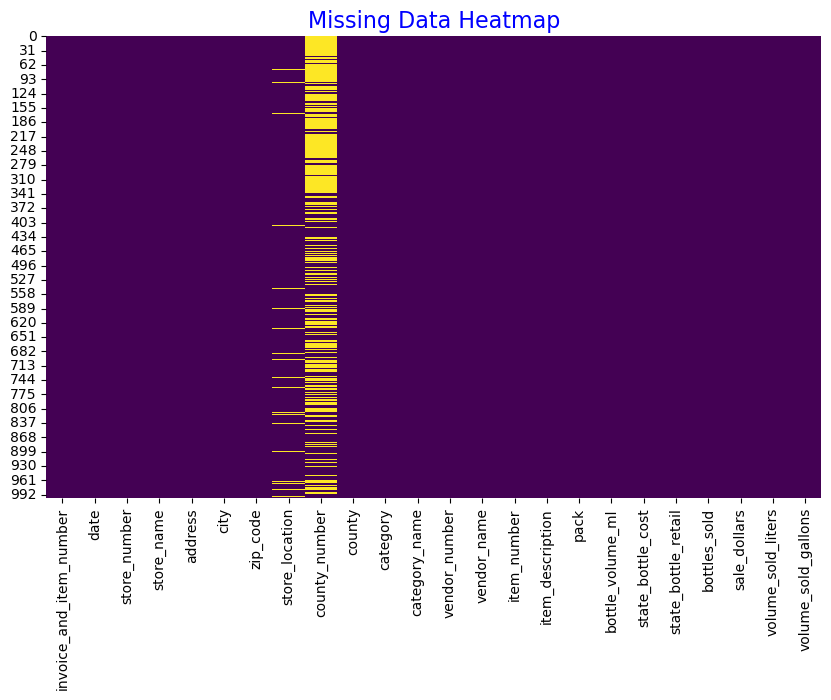

In [26]:
# You can also visualize missing values using a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False,  cmap='viridis')
plt.title('Missing Data Heatmap', fontsize = 16, color = 'blue')
plt.show()

## 4. Data Types and Conversion : Ensure the data types are correct

In [28]:
# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure numerical columns are of correct type
df['state_bottle_cost'] = pd.to_numeric(df['state_bottle_cost'], errors='coerce')
df['state_bottle_retail'] = pd.to_numeric(df['state_bottle_retail'], errors='coerce')
df['bottles_sold'] = pd.to_numeric(df['bottles_sold'], errors='coerce')
df['sale_dollars'] = pd.to_numeric(df['sale_dollars'], errors='coerce')
df['volume_sold_liters'] = pd.to_numeric(df['volume_sold_liters'], errors='coerce')
df['volume_sold_gallons'] = pd.to_numeric(df['volume_sold_gallons'], errors='coerce')


In [29]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,RINV-04399000061,2022-11-29,2512,HY-VEE WINE AND SPIRITS / IOWA CITY,1720 WATERFRONT DR,IOWA CITY,52240.0,POINT(-91.53043 41.6426),NaN,JOHNSON,...,85437,MR BOSTON BLUE CURACAO,12,1000,4.5,6.75,48,324.0,48.00,12.68
1,RINV-04683400018,2023-06-09,3930,KUENNEN'S LIQUOR STORE,106 W MAINS ST PO BOX 142,ST LUCAS,52166.0,POINT(-91.93384701 43.066768997),NaN,FAYETTE,...,1799,CAPTAIN MORGAN ORIGINAL SPICED BARREL,6,1750,18.0,27.00,12,324.0,21.00,5.54
2,RINV-04650600145,2023-05-22,2665,HY-VEE / WAUKEE,1005 E HICKMAN RD,WAUKEE,50263.0,POINT(-93.854388964 41.6174140110001),NaN,DALLAS,...,16676,BASIL HAYDEN 8YR,12,750,22.5,33.75,24,810.0,18.00,4.75
3,RINV-04532200057,2023-03-01,5441,LIQUOR ON THE CORNER,300 EAST MAIN,CHEROKEE,51012.0,POINT(-95.54647 42.74958),NaN,CHEROKEE,...,19477,MAKERS MARK,12,1000,22.5,33.75,12,405.0,12.00,3.17
4,RINV-04775300034,2023-07-31,4973,QUILLINS QUALITY FOODS WEST UNION,"303, HWY 150 N",WEST UNION,52175.0,POINT(-91.815246014 42.965227018),NaN,FAYETTE,...,11788,BLACK VELVET,6,1750,11.0,16.50,6,99.0,10.50,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,INV-71981200012,2024-07-08,4787,380BP / SWISHER,2722 NE 120TH ST,SWISHER,52338.0,POINT(-91.664584489 41.84887461),NaN,JOHNSON,...,28275,JIM BEAM PEACH MINI,12,50,7.0,10.50,1,10.5,0.05,0.01
996,INV-37741000040,2021-06-23,2501,HY-VEE #2 / AMES,640 LINCOLNWAY,AMES,50010.0,NaN,85.0,STORY,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.10,1,8.1,0.05,0.01
997,INV-27971400023,2020-06-15,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT(-91.701581 42.030129),57.0,LINN,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.10,1,8.1,0.05,0.01
998,INV-22034600031,2019-09-20,4291,FAREWAY STORES #597 / CRESTON,105 E ADAMS ST,CRESTON,50801.0,POINT(-94.237509 40.715722),88.0,UNION,...,28275,JIM BEAM PEACH MINI,12,50,5.4,8.10,1,8.1,0.05,0.01


## 5. Shape of Data Frame

In [31]:
df.shape

(1000, 24)

## 6. Column-Names

In [33]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

## 7. Distribution of Columns : Visualize distributions of numerical columns using histograms or box plots.

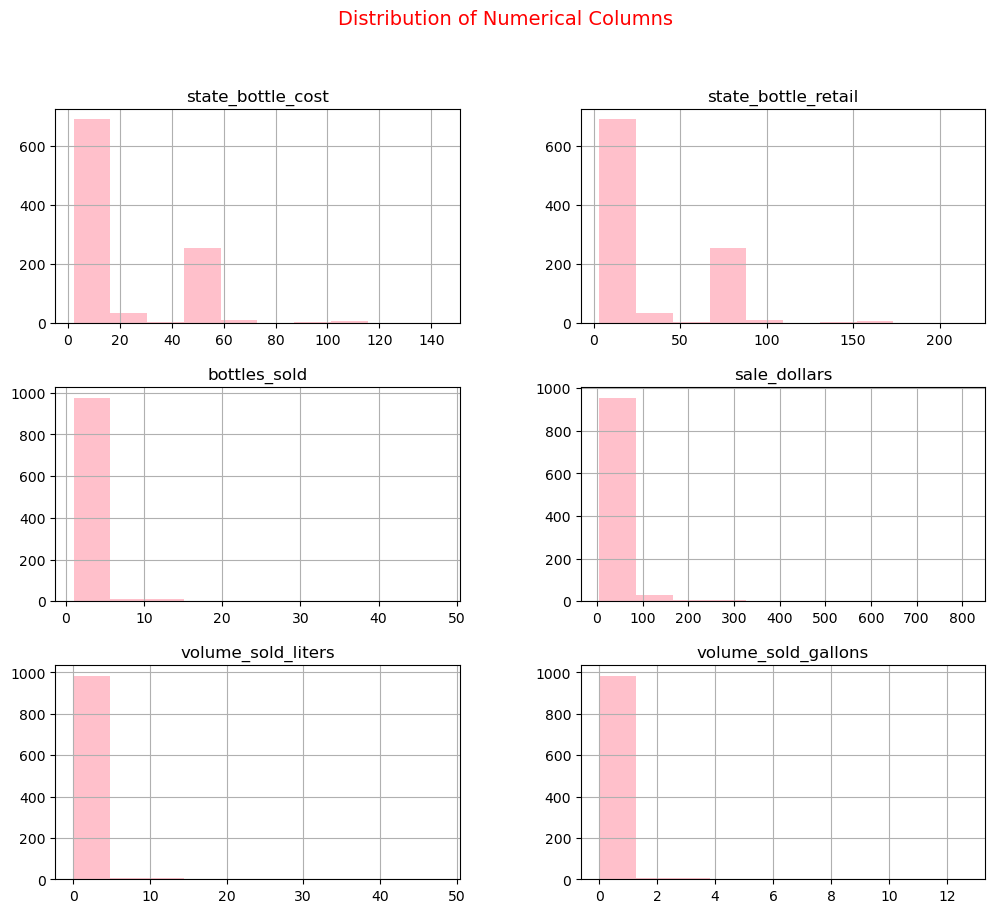

In [43]:
# List of numerical columns to plot
numerical_columns = ['state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 
                     'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons']

# Plot histograms for all numerical columns
df[numerical_columns].hist(bins=10, figsize=(12, 10), color='pink')
plt.suptitle('Distribution of Numerical Columns', color='red', fontsize = 14)
plt.show()

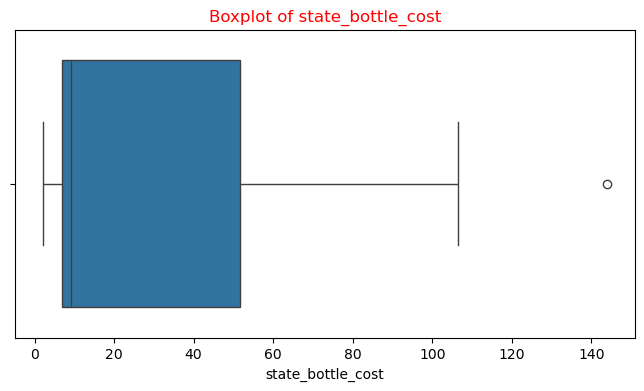

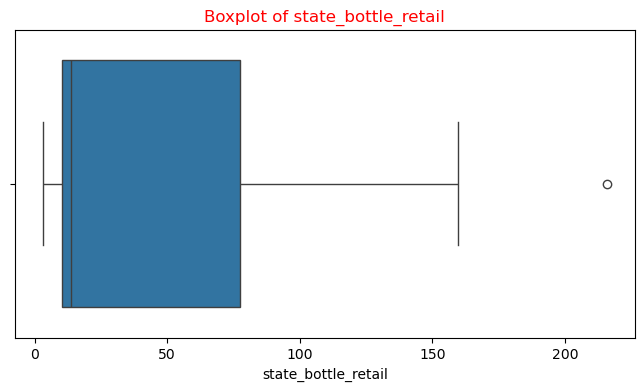

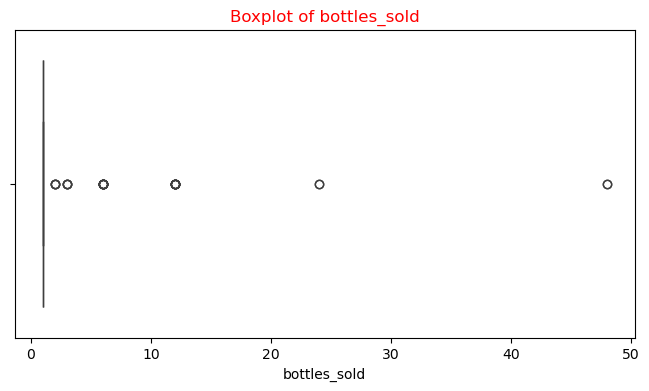

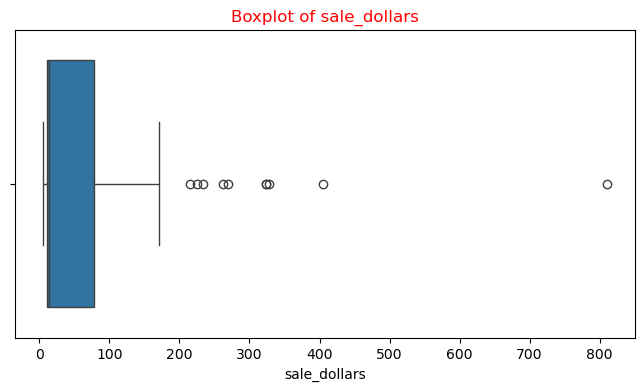

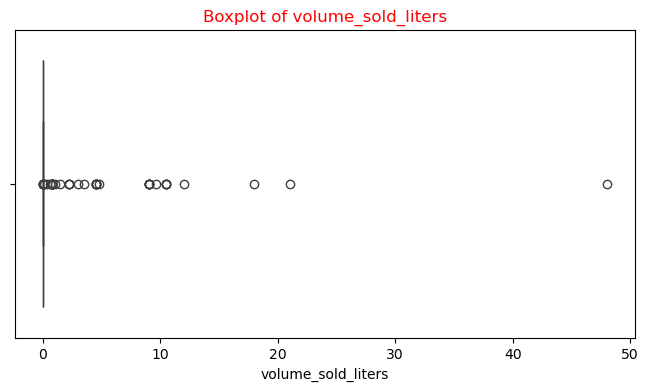

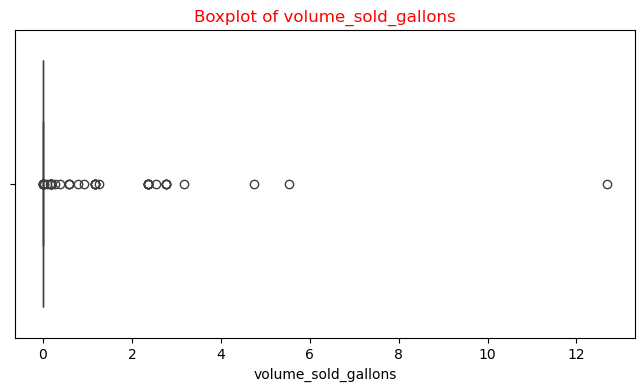

In [45]:
# Plot box plots to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', color='red')
    plt.show()

## 8. Correlation Analysis : Check correlations between numerical variables.

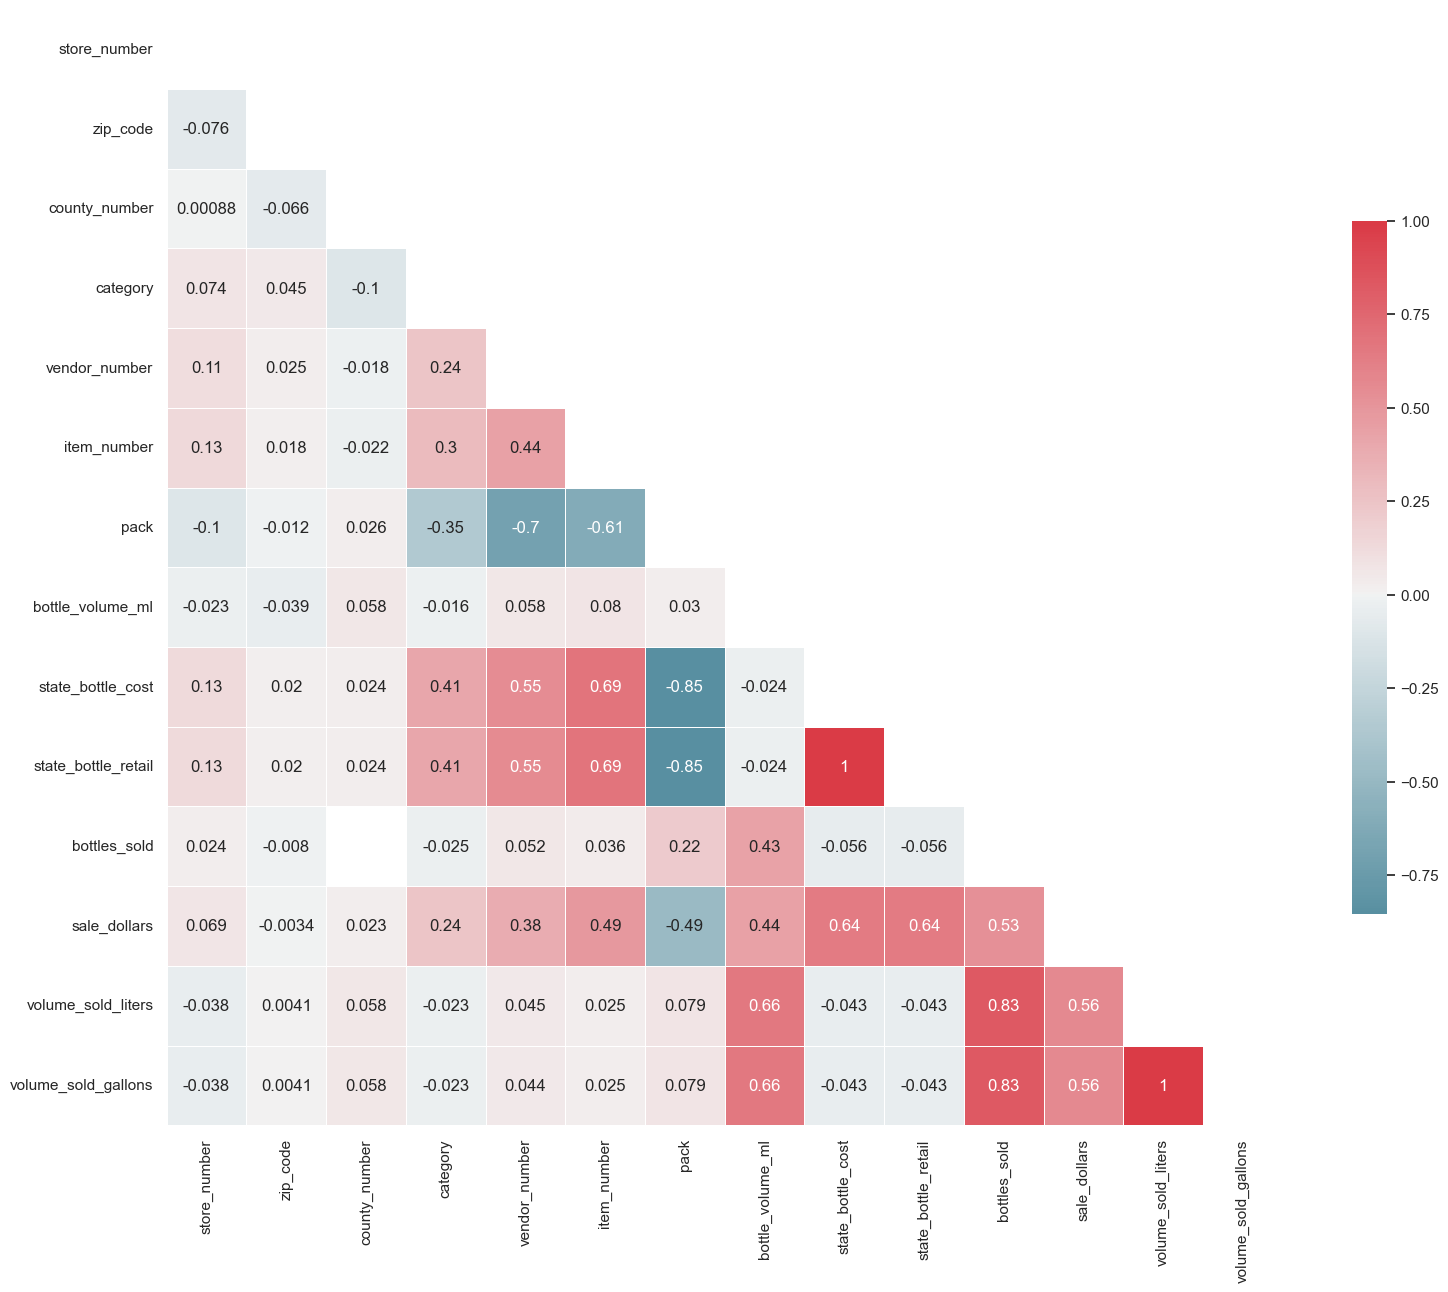

In [51]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(numeric_only = True), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

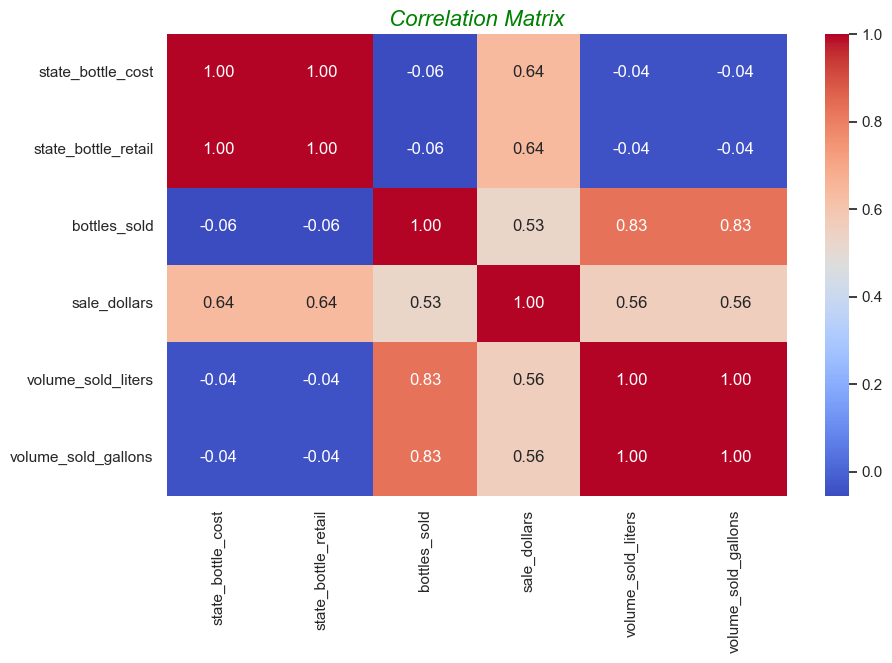

In [53]:
# Correlation matrix
corr_matrix = df[numerical_columns].corr()

# Heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16, color='green',
          fontstyle='oblique')
plt.show()

## 9. Category Analysis : Explore categorical variables and their relationships with numerical variables.

In [55]:
#item_description

# Get unique values from the 'category' column
item_description_categories = df['item_description'].unique()

# Print the unique categories
# item_description_categories

In [57]:
item_description_counts = df['item_description'].value_counts()

# Print the category counts
item_description_counts

item_description
FIREBALL CINNAMON WHISKEY PARTY BUCKET    113
JACK DANIELS OLD #7 BLACK LABEL MINI      101
BLACK VELVET MINI                          73
JIM BEAM MINI                              71
CROWN ROYAL MINI                           49
                                         ... 
YUKON JACK ASSORTED MINIS                   1
WHISTLEPIG 6YR PIGGYBACK RYE                1
CROWN ROYAL MULTIBRAND ADVENT CALENDAR      1
KETEL ONE                                   1
MR BOSTON BLUE CURACAO                      1
Name: count, Length: 135, dtype: int64

In [61]:
# Get unique values from the 'category' column
unique_categories = df['category'].unique()

# Print the unique categories
unique_categories

array([1081400., 1062400., 1011200., 1012100., 1031100., 1062500.,
       1062200., 1022200., 1041100., 1031200., 1051100., 1071000.,
       1062300., 1081600., 1081200., 1032100., 1022300., 1011400.,
       1082200., 1701100., 1012200., 1081300., 1011100., 1082100.,
       1082000., 1012400., 1700000., 1011600., 1081000., 1042100.])

In [63]:
# Get the count of each category
category_counts = df['category'].value_counts()

# Print the category counts
category_counts

category
1011200.0    221
1012100.0    203
1081600.0    132
1011100.0    107
1011400.0    102
1701100.0     74
1081400.0     59
1081300.0     31
1012400.0     25
1031200.0      6
1022200.0      5
1700000.0      5
1011600.0      4
1081200.0      3
1082000.0      2
1082100.0      2
1081000.0      2
1012200.0      2
1032100.0      2
1031100.0      2
1042100.0      2
1082200.0      1
1022300.0      1
1062400.0      1
1062300.0      1
1071000.0      1
1051100.0      1
1041100.0      1
1062200.0      1
1062500.0      1
Name: count, dtype: int64

In [64]:
# Get unique values from the 'category' column
unique_categories_name = df['category_name'].unique()

# Print the unique categories
unique_categories_name

array(['AMERICAN SCHNAPPS', 'SPICED RUM', 'STRAIGHT BOURBON WHISKIES',
       'CANADIAN WHISKIES', 'AMERICAN VODKAS', 'FLAVORED RUM',
       'WHITE RUM', '100% AGAVE TEQUILA', 'AMERICAN DRY GINS',
       'AMERICAN FLAVORED VODKA', 'AMERICAN BRANDIES', 'COCKTAILS/RTD',
       'AGED DARK RUM', 'WHISKEY LIQUEUR', 'CREAM LIQUEURS',
       'IMPORTED VODKAS', 'MEZCAL', 'TENNESSEE WHISKIES',
       'IMPORTED SCHNAPPS', 'TEMPORARY & SPECIALTY PACKAGES',
       'SCOTCH WHISKIES', 'AMERICAN CORDIALS & LIQUEURS',
       'BLENDED WHISKIES', 'IMPORTED CORDIALS & LIQUEURS',
       'IRISH WHISKIES', 'STRAIGHT RYE WHISKIES', 'IMPORTED DRY GINS'],
      dtype=object)

In [65]:
# Get the count of each category
category_name_counts = df['category_name'].value_counts()
# Print the category counts
category_name_counts

category_name
STRAIGHT BOURBON WHISKIES         221
CANADIAN WHISKIES                 203
WHISKEY LIQUEUR                   132
BLENDED WHISKIES                  107
TENNESSEE WHISKIES                102
TEMPORARY & SPECIALTY PACKAGES     79
AMERICAN SCHNAPPS                  59
AMERICAN CORDIALS & LIQUEURS       33
IRISH WHISKIES                     25
AMERICAN FLAVORED VODKA             6
100% AGAVE TEQUILA                  5
STRAIGHT RYE WHISKIES               4
IMPORTED CORDIALS & LIQUEURS        4
CREAM LIQUEURS                      3
SCOTCH WHISKIES                     2
AMERICAN VODKAS                     2
IMPORTED DRY GINS                   2
IMPORTED VODKAS                     2
AMERICAN DRY GINS                   1
IMPORTED SCHNAPPS                   1
FLAVORED RUM                        1
MEZCAL                              1
SPICED RUM                          1
AGED DARK RUM                       1
COCKTAILS/RTD                       1
AMERICAN BRANDIES                   

In [66]:
# Get unique values from the 'category' column
unique_vendor_name = df['vendor_name'].unique()

# Print the unique categories
unique_vendor_name

array(['SAZERAC COMPANY  INC', 'DIAGEO AMERICAS', 'JIM BEAM BRANDS',
       'HEAVEN HILL BRANDS', 'FIFTH GENERATION INC', 'PERNOD RICARD USA',
       'BACARDI USA INC', 'PROXIMO', 'REVELTON DISTILLING COMPANY',
       'JEM BEVERAGE COMPANY / WESTERN SON', 'PHILLIPS BEVERAGE',
       'E & J GALLO WINERY', 'MISSISSIPPI RIVER DISTILLING COMPANY LLC',
       'SOVEREIGN BRANDS, LLC', 'MPL BRANDS NV INC/ PATCO BRANDS',
       'LUXCO INC', 'INFINIUM SPIRITS', 'BLUE OX SPIRITS, INC.',
       'MHW LTD', 'BROWN FORMAN CORP.', 'MOET HENNESSY USA',
       'CEDAR RIDGE VINEYARDS LL', 'CAMPARI AMERICA',
       'MAST-JAGERMEISTER US, INC', 'SAZERAC NORTH AMERICA',
       'GOAMERICAGO BEVERAGES LLC / WHISTLEPIG',
       'SUGARLANDS DISTILLING COMPANY LLC', 'PIEDMONT DISTILLERS INC',
       'ATOMIC BRANDS INC', 'CONSTELLATION BRANDS INC',
       'KIRIN BEER & SPIRITS OF AMERICA INC / FOUR ROSES DISTILLERY',
       'WESTERN SPIRITS BEVERAGE', 'MISSISSIPPI RIVER DISTIL',
       'DUNKEL CORPORATION / IOWA

In [67]:
# Get the count of each category
vendor_name_counts = df['vendor_name'].value_counts()
# Print the category counts
vendor_name_counts

vendor_name
SAZERAC COMPANY  INC                                           269
JIM BEAM BRANDS                                                235
DIAGEO AMERICAS                                                156
BROWN FORMAN CORP.                                             102
HEAVEN HILL BRANDS                                              78
WESTERN SPIRITS BEVERAGE                                        45
PERNOD RICARD USA                                               32
PHILLIPS BEVERAGE                                               11
GOAMERICAGO BEVERAGES LLC / WHISTLEPIG                           7
E & J GALLO WINERY                                               7
MAST-JAGERMEISTER US, INC                                        6
CAMPARI AMERICA                                                  6
DUNKEL CORPORATION / IOWA DISTILLING                             5
BACARDI USA INC                                                  5
PIEDMONT DISTILLERS INC                           

In [68]:
# Get unique values from the 'category' column
county_name = df['county'].unique()

# Print the unique categories
county_name

array(['JOHNSON', 'FAYETTE', 'DALLAS', 'CHEROKEE', 'KOSSUTH',
       'BLACK HAWK', 'POLK', 'LINN', 'WOODBURY', 'WRIGHT', 'JASPER',
       'CLAY', 'SCOTT', 'CLINTON', 'GRUNDY', 'WARREN', 'LYON', 'BUCHANAN',
       'MARSHALL', 'WEBSTER', 'DUBUQUE', 'DES MOINES', 'CARROLL',
       'POTTAWATTAMIE', 'MUSCATINE', 'APPANOOSE', 'IOWA', 'SAC',
       'VAN BUREN', 'MADISON', 'CASS', 'STORY', 'GREENE', 'CERRO GORDO',
       'FRANKLIN', 'WINNEBAGO', 'MARION', 'HARDIN', 'POWESHIEK',
       'MITCHELL', 'MONONA', 'MILLS', 'DICKINSON', 'BOONE', 'SIOUX',
       'JEFFERSON', 'PAGE', 'GUTHRIE', 'UNION', 'BUENA VISTA', 'FLOYD',
       'MAHASKA', 'BENTON', 'LUCAS', "O'BRIEN", 'HENRY', 'LEE', 'WAYNE',
       'PALO ALTO', 'TAMA', 'CRAWFORD', 'ADAIR', 'CLAYTON', 'HAMILTON',
       'HARRISON', 'TAYLOR', 'JONES', 'PLYMOUTH', 'DELAWARE', 'FREMONT',
       'BUTLER', 'WAPELLO', 'JACKSON', 'DAVIS', 'CEDAR', 'WASHINGTON',
       'OSCEOLA', 'BREMER', 'HUMBOLDT', 'CHICKASAW', 'WINNESHIEK',
       'MONTGOMERY', 'POCAHO

In [69]:
county_count = df['county'].value_counts()
county_count

county
POLK          195
LINN           99
BLACK HAWK     60
JOHNSON        54
SCOTT          50
             ... 
WAYNE           1
POCAHONTAS      1
ALLAMAKEE       1
IDA             1
SHELBY          1
Name: count, Length: 86, dtype: int64

In [70]:
# Get the count of each county
county_counts = df['county'].value_counts()
# Print the category county
county_counts.head(20)

county
POLK             195
LINN              99
BLACK HAWK        60
JOHNSON           54
SCOTT             50
STORY             35
DALLAS            25
DUBUQUE           24
POTTAWATTAMIE     21
WOODBURY          17
MUSCATINE         16
WARREN            15
WEBSTER           14
DES MOINES        14
CLAY              13
CARROLL           12
JASPER            12
CLINTON           12
LEE               11
DICKINSON         11
Name: count, dtype: int64

In [71]:
county_counts.sum()

1000

In [73]:
# Get the count of each store_name
store_name_counts = df['store_name'].value_counts()
# Print the store_name
store_name_counts.head(20)

store_name
HY-VEE FOOD AND DRUG #6 / CEDAR RAPIDS    9
J D SPIRITS LIQUOR                        8
HY-VEE #7 / CEDAR RAPIDS                  8
QUIK TRIP #559 / FLEUR                    8
HY-VEE / WAVERLY                          7
HY-VEE #2 / CORALVILLE                    6
HY-VEE FOOD STORE / CEDAR FALLS           6
HY-VEE WINE AND SPIRITS / BETTENDORF      5
PHILLIPS 66 / GRINNELL                    5
MARKET EXPRESS                            5
HY-VEE FOOD STORE #1636 / SPENCER         5
HY-VEE #4 / WDM                           5
KUM & GO #0131 / HUXLEY                   5
QUIK TRIP #513 / URBANDALE                5
HY-VEE WINE & SPIRITS #2 / DAVENPORT      5
STAMMER LIQUOR CORP                       5
HY-VEE / WAUKEE                           5
HY-VEE / CHARLES CITY                     5
QUIK TRIP #562 / NE 14TH / DSM            5
HY-VEE WINE AND SPIRITS / WATERLOO        5
Name: count, dtype: int64

In [74]:
# Get the count of each state_bottle_cost
state_bottle_cost_counts = df['state_bottle_cost'].value_counts()
# Print the state_bottle_cost
state_bottle_cost_counts.head(20)

state_bottle_cost
51.60    220
7.00     107
5.40     101
7.35      63
11.50     55
9.06      46
8.50      38
52.40     28
9.95      26
8.87      23
5.00      23
5.80      18
5.94      16
6.17      16
6.80      13
5.91      13
8.30      11
9.90      11
5.76      10
13.20     10
Name: count, dtype: int64

In [75]:
state_bottle_cost_counts.sum()

1000

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


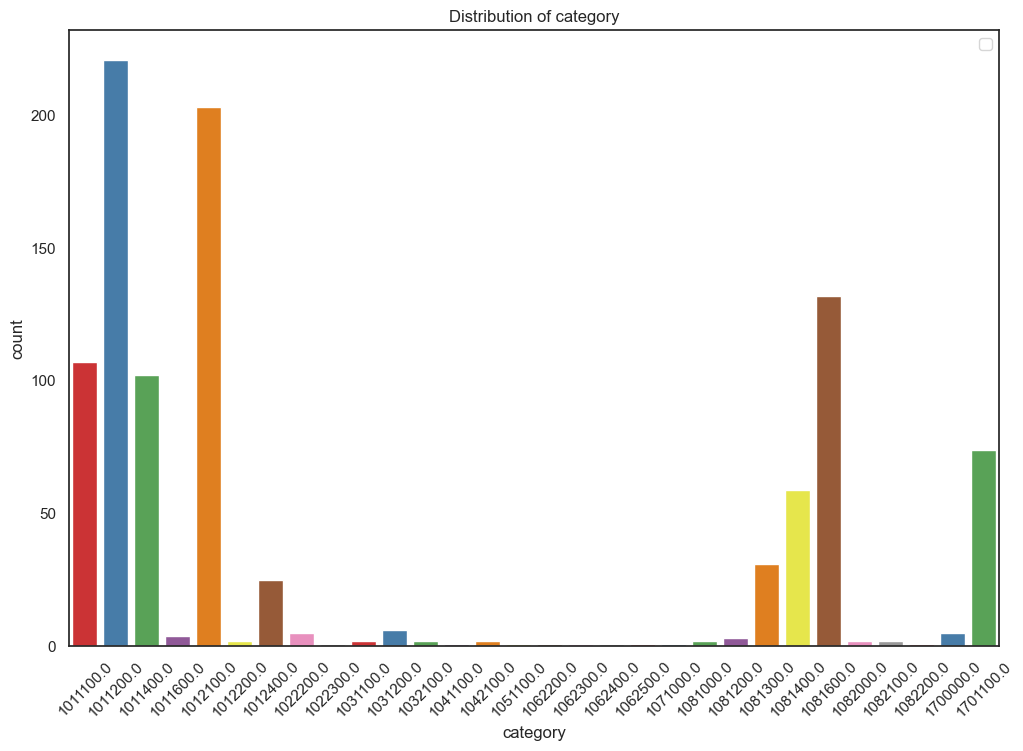

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


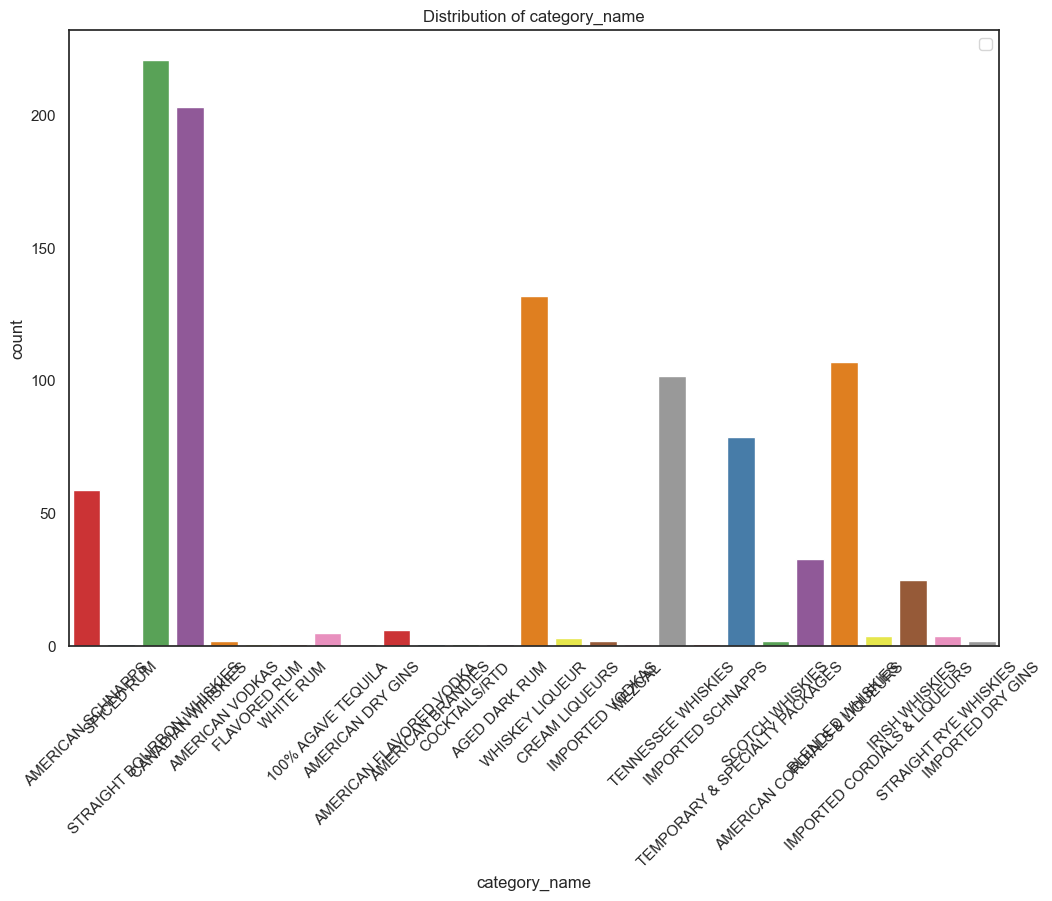

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


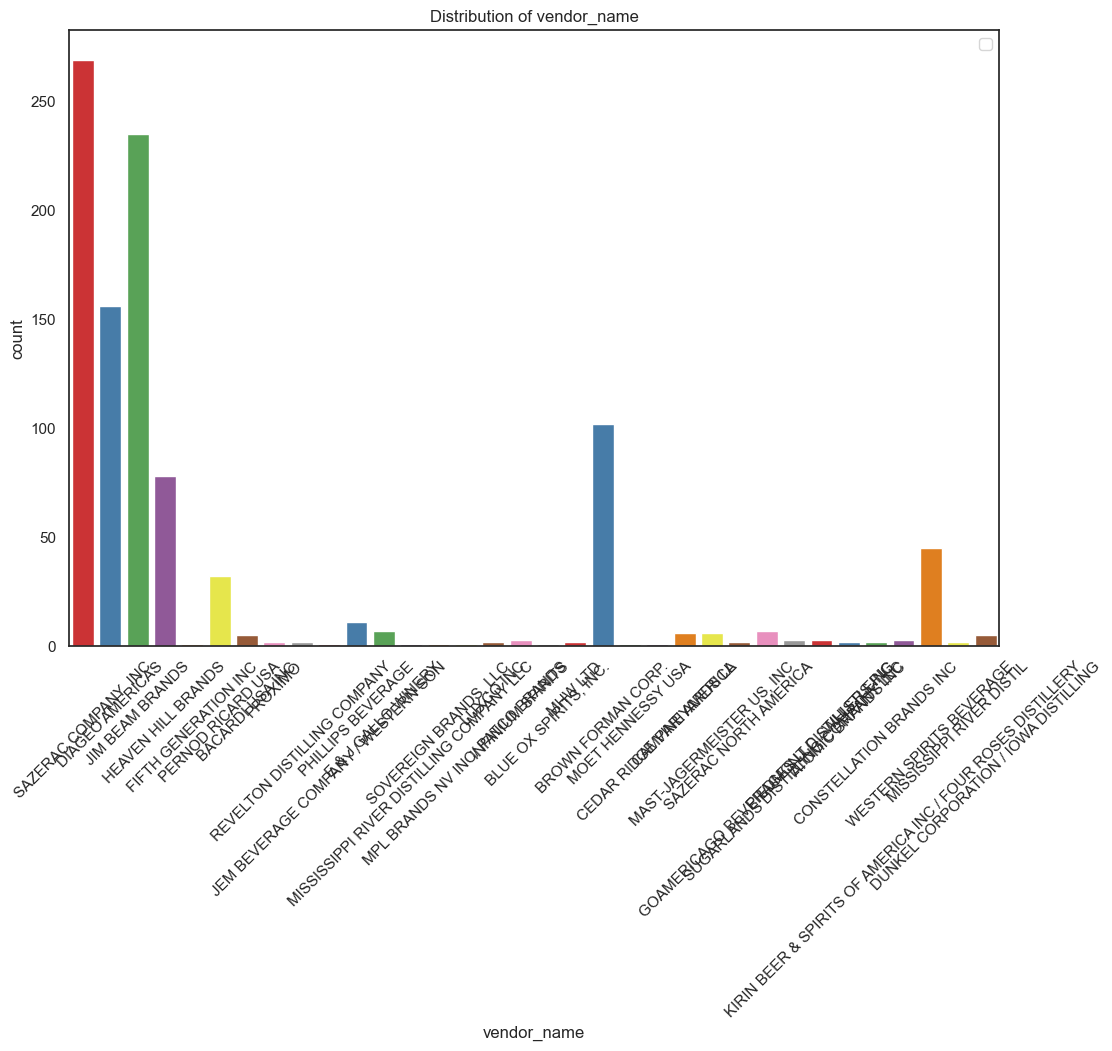

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


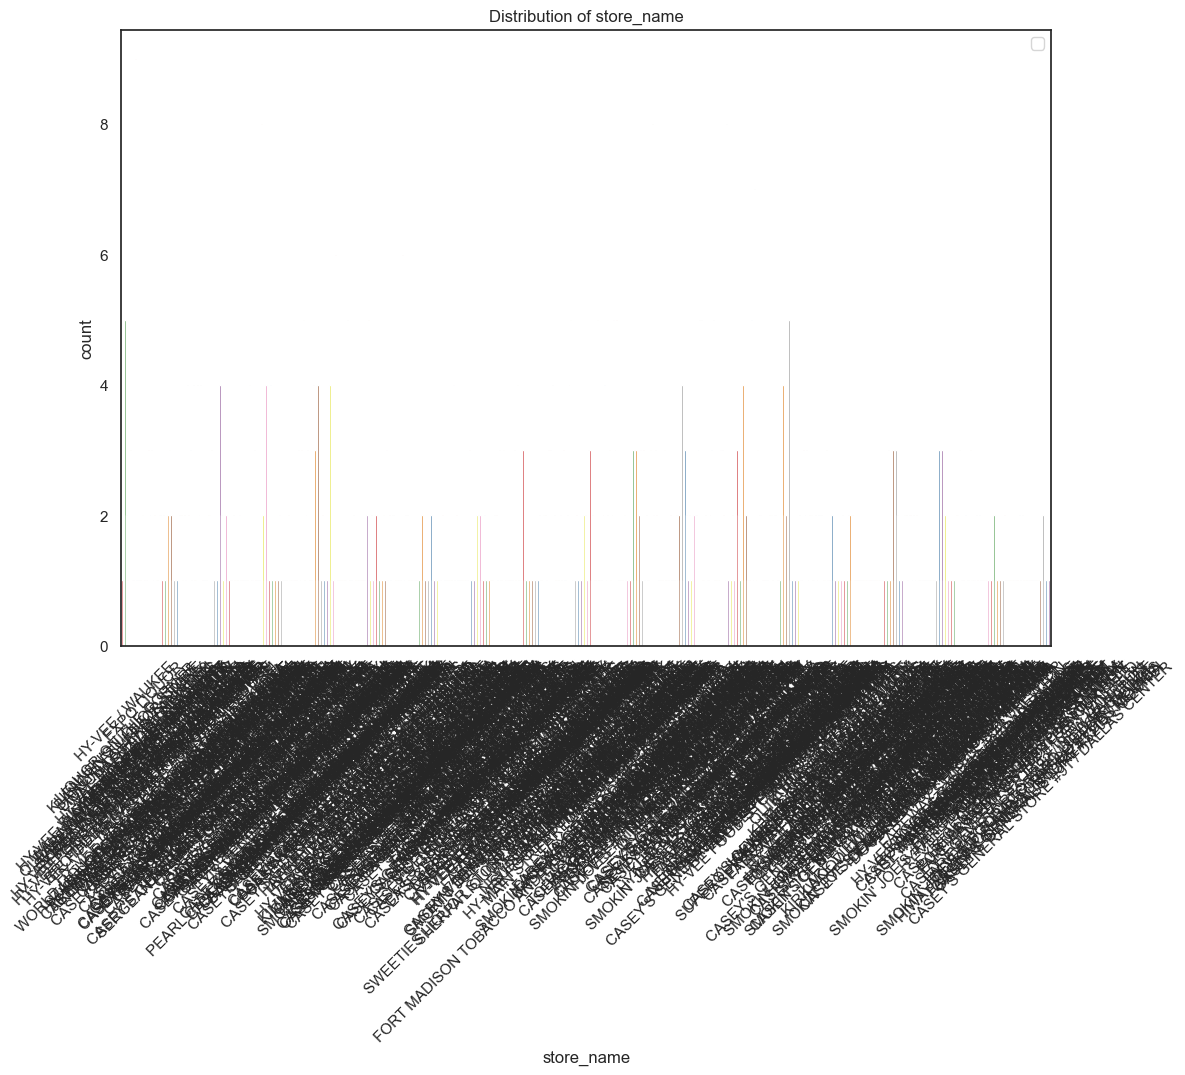

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


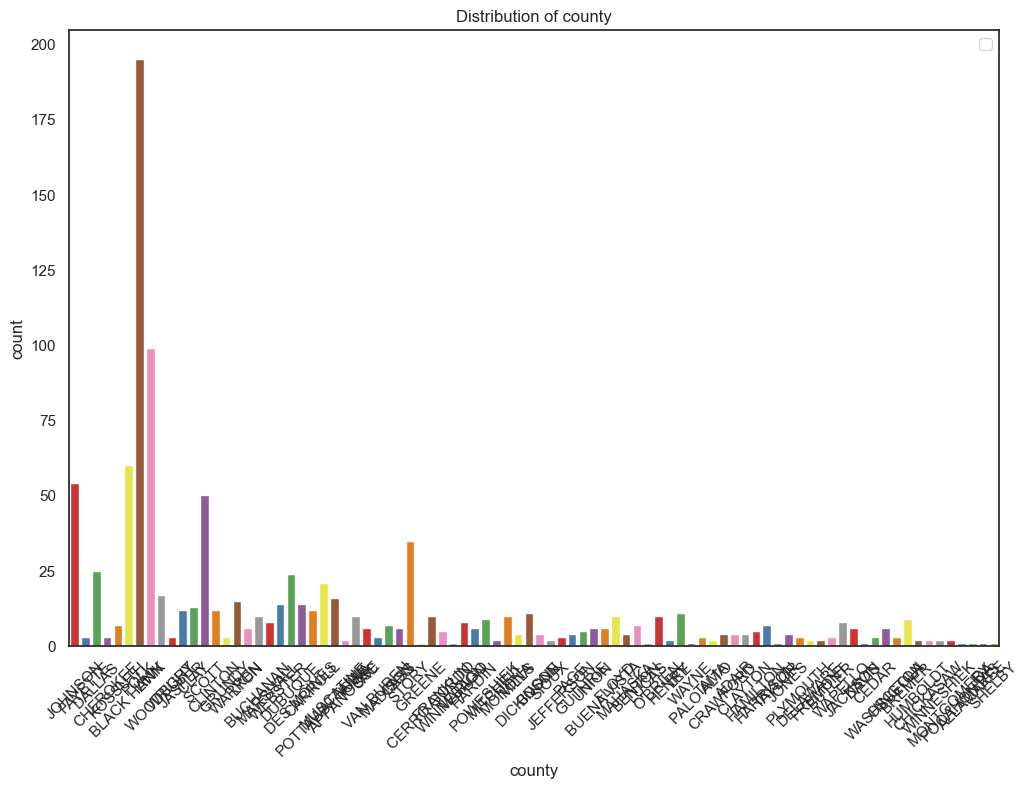

/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col, palette='Set1')
/var/folders/f9/r818jlhd0rn1qvxs5ry8t4jm0000gn/T/ipykernel_93982/527463017.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


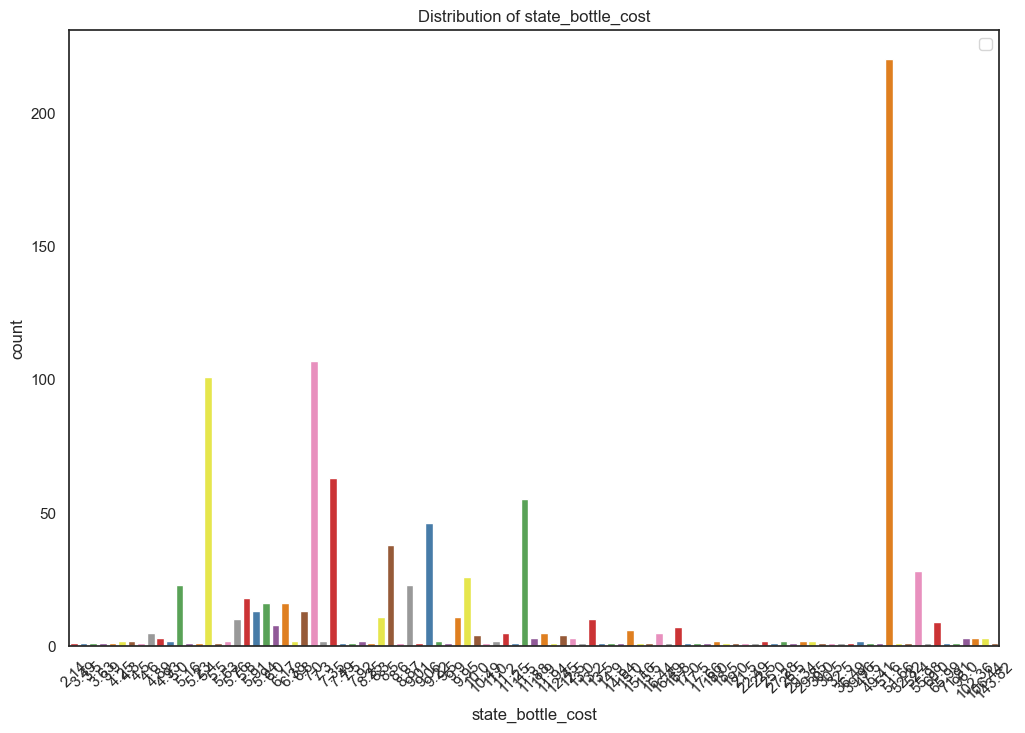

TypeError: 'bool' object is not iterable

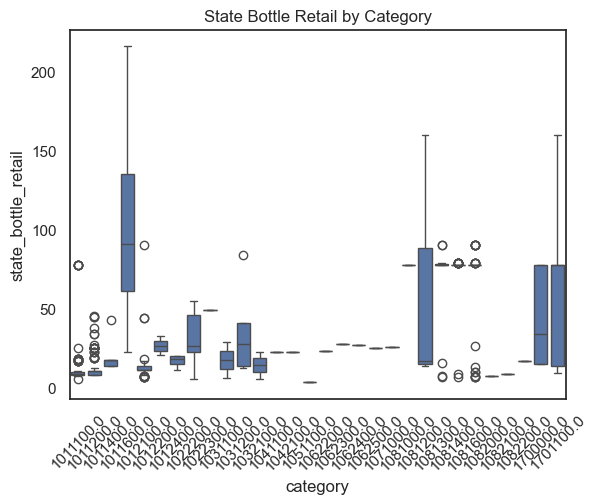

In [77]:
# Plot the distribution of categorical columns
categorical_columns = ['category', 'category_name', 'vendor_name', 'store_name', 'county', 'state_bottle_cost']

for col in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df,x=col, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
# Investigate relationship between categories and numerical columns
sns.boxplot(x='category', y='state_bottle_retail', data=df)
plt.title('State Bottle Retail by Category')
plt.xticks(rotation=45)
plt.legend(True)
plt.show()


In [ ]:
# Investigate relationship between categories and numerical columns

plt.figure(figsize=(12,8))
sns.boxplot(x='category', y='state_bottle_retail', data=df,
            palette="Set2")
plt.title('State Bottle Retail by Category', color='red',
          fontsize=16, fontstyle='oblique')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
mean_sales_by_region = df.groupby('category')['sale_dollars'].mean()
highsale=mean_sales_by_region.sort_values(ascending=False)
highsale.head()

In [ ]:
highsale.tail()

## 10. Outlier Detection : Identify and handle potential outliers.

In [ ]:
Q1 = df['state_bottle_retail'].quantile(0.25)
Q3 = df['state_bottle_retail'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['state_bottle_retail'] < lower_bound) | (df['state_bottle_retail'] > upper_bound)]
outliers

In [ ]:
outliers_grouped = outliers.groupby('item_description')[['state_bottle_retail']].sum().reset_index()

outliers_grouped

In [ ]:
Q1 = df['state_bottle_cost'].quantile(0.25)
Q3 = df['state_bottle_cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['state_bottle_cost'] < lower_bound) | (df['state_bottle_cost'] > upper_bound)]
outliers

In [ ]:
outliers_groups = outliers.groupby('item_description')[['state_bottle_cost']].sum().reset_index()

outliers_groups

In [ ]:
Q1 = df['zip_code'].quantile(0.25)
Q3 = df['zip_code'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['zip_code'] < lower_bound) | (df['zip_code'] > upper_bound)]
outliers

## 11. Time Series Analysis : Investigate trends over time (for date).

In [ ]:
import matplotlib.pyplot as plt

# Assuming the 'date' column is already in datetime format
df['month'] = df['date'].dt.to_period('M')  # Resample the data by month
monthly_sales = df.groupby('month')['sale_dollars'].sum()  # Sum of sales by month

# Plot time series data
plt.figure(figsize=(14, 8))
monthly_sales.plot(kind='line', marker='o', color='b')

# Title and labels
plt.title('Monthly Total Sales in Dollars', fontsize=16, color='green', fontstyle='oblique')
plt.xlabel('Month', fontsize=14, color='red', fontstyle='oblique')
plt.ylabel('Sales Dollars', color='red', fontstyle='oblique', fontsize=14)

# Formatting the x-axis to show month names correctly
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle='dotted', color='pink')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming the 'date' column is already in datetime format
df['year'] = df['date'].dt.to_period('Y')  # Resample the data by year
yearly_sales = df.groupby('year')['sale_dollars'].sum()  # Sum of sales by year

# Plot time series data for sales by year
plt.figure(figsize=(14, 8))
yearly_sales.plot(kind='line', marker='o', color='r')

# Title and labels
plt.title('Yearly Total Sales in Dollars', fontsize=16, color='green', fontstyle='oblique')
plt.xlabel('Year', fontsize=14, color='red', fontstyle='oblique')
plt.ylabel('Sales Dollars', color='red', fontstyle='oblique', fontsize=14)

# Formatting the x-axis to show year labels clearly
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle='dotted', color='pink')

# Show the plot
plt.show()


## 12. List Unique Vendor Names

In [ ]:
# Get unique vendor names from the 'vendor_name' column
unique_vendors = df['vendor_name'].unique()

# Print the unique vendor names
unique_vendors

In [ ]:
vendor_counts = df['vendor_name'].value_counts()

# Print the counts
vendor_counts

## Analysis for Highest occuring Company

In [ ]:
# Filter rows where the vendor name  is 'SAZERAC COMPANY  INC'
vendor_name_set =df[df['vendor_name'] == 'SAZERAC COMPANY  INC']

# Display the rows of the filtered data
vendor_name_set

groups_vendor=vendor_name_set.groupby('county').agg(
    vendor_count=('vendor_name', 'size'),  # Count occurrences of the vendor in each county
    vendor_names=('vendor_name', 'sum')    # Sum (or concatenate) vendor names (if needed)
).reset_index()
groups_vendor

In [ ]:
# Filter the rows where the vendor count is 1
vendor_count_42 = groups_vendor[groups_vendor['vendor_count'] == 42]

# Display the filtered rows where vendor count = 1
vendor_count_42

In [ ]:
# Filter the rows where the vendor count is 1
vendor_count_1 = groups_vendor[groups_vendor['vendor_count'] == 1]

# Display the filtered rows where vendor count = 1
vendor_count_1

In [ ]:
# Find the maximum vendor count
max_vendor_count = groups_vendor['vendor_count'].max()

# Find the minimum vendor count
min_vendor_count = groups_vendor['vendor_count'].min()

# Display the results
print(f"Maximum Vendor Count: {max_vendor_count}")
print(f"Minimum Vendor Count: {min_vendor_count}")

## Interpretation: It shows that number

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


groups_vendor
# Group by 'county' and count the occurrences of the vendor in each county
groups_vendor = vendor_name_set.groupby('county').size().reset_index(name='vendor_count')

# Sort by vendor_count for better visualization (optional)
groups_vendor = groups_vendor.sort_values(by='vendor_count', ascending=True)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='county', y='vendor_count', data=groups_vendor, palette='viridis')

# Customize plot
plt.title('Number of Occurrences of SAZERAC COMPANY INC by County', fontsize=16, color='red')
plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=45, ha='right')              # Rotate county names for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## 13. Select a Subset of Rows Based on a Item Description

In [ ]:
# Filter rows where the item_description is 'Jim Beam Peah mini'
vendor_subset =df[df['item_description'] == 'JIM BEAM PEACH MINI']

# Display the rows of the filtered data
vendor_subset

groups = vendor_subset.groupby('store_name')['item_description'].count().reset_index()


groups

In [ ]:
# Filter rows where the item_description 
vendor_subset1 =df[df['item_description'] == 'BLACK VELVET MINI']

# Display the rows of the filtered data
vendor_subset1

groups1 = vendor_subset1.groupby('store_name')['item_description'].count().reset_index()

groups1

In [ ]:
#KETEL ONE 

# Filter rows where the item_description 
vendor_subset2 =df[df['item_description'] == 'KETEL ONE']

# Display the rows of the filtered data
vendor_subset2

groups1 = vendor_subset2.groupby('store_name')[['item_description']].sum().reset_index()

groups1

## 14. Select a Subset of Rows Based on city

In [ ]:
# Filter rows where city is 'IOWA CITY'
iowa_city_vendors = df[df['city'] == 'IOWA CITY']

# Get unique vendors in IOWA CITY
iowa_city_vendors_unique = iowa_city_vendors['vendor_name'].unique()

# Print the unique vendor names in IOWA CITY
iowa_city_vendors_unique
iowa_city_vendors_unique_df = pd.DataFrame(iowa_city_vendors_unique, columns=['Vendor Name'])

# Print the result in a table or DataFrame
iowa_city_vendors_unique_df



In [ ]:
# Filter rows where city is 'IOWA CITY'
iowa_city_vendors = df[df['city'] == 'ST LUCAS']

# Get unique vendors in IOWA CITY
iowa_city_vendors_unique = iowa_city_vendors['vendor_name'].unique()

# Print the unique vendor names in IOWA CITY
iowa_city_vendors_unique
iowa_city_vendors_unique_df = pd.DataFrame(iowa_city_vendors_unique, columns=['Vendor Name'])

# Print the result in a table or DataFrame
iowa_city_vendors_unique_df



In [ ]:
# List of vendors to filter by
vendors_of_interest = ['JIM BEAM BRANDS', 'PHILLIPS BEVERAGE']

# Filter rows where the vendor_name is either 'Jim Beam' or 'Jack Daniels'
filtered_vendors = df[df['vendor_name'].isin(vendors_of_interest)]

# Display the filtered data
filtered_vendors

## 15. To find the vendor names with sales greater than median in 2024.
### Perform the following steps:

1. Filter the data for sales in 2024.
2. Filter the data for sales greater than nedian.
3. Group by vendor_name and aggregate the sales for each vendor.
4. Filter out vendors whose total sales are greater than median.

In [ ]:
df_2024 = df[df['date'].dt.year == 2024]

In [ ]:
df_2024.head()

In [ ]:
# Corrected Code
df_sales_above_med = df_2024[df_2024['sale_dollars'] > df_2024['sale_dollars'].median()]


In [ ]:
df_2024['sale_dollars'].median()

In [ ]:
df_sales_above_med

In [ ]:
# Assuming df_sales_above_med is already defined and contains the necessary columns
vendor_sales_2024 = df_sales_above_med.groupby('vendor_name')['sale_dollars'].sum().reset_index()


In [ ]:
vendors_above_med= vendor_sales_2024[vendor_sales_2024['sale_dollars'] > df_2024['sale_dollars'].median()]

# Print the result
vendors_above_med

## 16. To find the vendor names with sales greater than median in data
### Perform the following steps:

1. Filter the data for sales
2. Filter the data for sales greater than median .
3. Group by vendor_name and aggregate the sales for each vendor.
4. Filter out vendors whose total sales are greater than median .

In [ ]:
df['sale_dollars']

In [ ]:
df_sales_abov_med = df[df['sale_dollars'] > df['sale_dollars'].median()]

In [ ]:
df['sale_dollars'].median()

In [ ]:
df_sales_abov_med


In [ ]:
# Group by vendor_name and sum the sale_dollars
vendor_sale = df_sales_abov_med.groupby('vendor_name')['sale_dollars'].sum().reset_index()

# Filter vendors with total sales above 100
vendor_abov_med = vendor_sale[vendor_sale['sale_dollars'] > 100]

# Print the result
vendor_abov_med

## 17. Correlation and Best Fit Lines
To compute the correlation and plot best-fit lines for data

### 1. Correlation
Correlation measures the relationship between two variables. The most commonly used measure of correlation is Pearson's correlation coefficient, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 means no correlation.


### 2. Best Fit Line
A best-fit line, or linear regression line, which represents the relationship between two continuous variables. We can calculate and plot a best-fit line using scipy.stats.linregress or sklearn.linear_model.LinearRegression.

## Pairs

1. state_bottle_cost vs state_bottle_retail
2. bottle_volume_ml vs sale_dollars
3. volume_sold_liters vs sale_dollars
4. bottles_sold vs state_bottle_retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Ensure that the columns you're using are numeric
df['state_bottle_cost'] = pd.to_numeric(df['state_bottle_cost'], errors='coerce')
df['state_bottle_retail'] = pd.to_numeric(df['state_bottle_retail'], errors='coerce')
df['bottle_volume_ml'] = pd.to_numeric(df['bottle_volume_ml'], errors='coerce')
df['sale_dollars'] = pd.to_numeric(df['sale_dollars'], errors='coerce')
df['volume_sold_liters'] = pd.to_numeric(df['volume_sold_liters'], errors='coerce')
df['bottles_sold'] = pd.to_numeric(df['bottles_sold'], errors='coerce')

# List of pairs to analyze
pairs = [
    ('state_bottle_cost', 'state_bottle_retail'),
    ('bottle_volume_ml', 'sale_dollars'),
    ('volume_sold_liters', 'sale_dollars'),
    ('bottles_sold', 'state_bottle_retail')
]

# Function to compute correlation and plot best fit line

def plot_best_fit_line(x_col, y_col):
    # Calculate Pearson correlation
    correlation = df[x_col].corr(df[y_col])
    
    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    
    # Plotting the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], label='Data Points', color='blue')
    
    # Plot the best fit line
    plt.plot(df[x_col], slope * df[x_col] + intercept, color='red', label=f'Best Fit Line (y = {slope:.2f}x + {intercept:.2f})')
    
    # Labels and title

    
    plt.xlabel(x_col, color='red', fontsize=12, fontstyle='oblique')
    plt.ylabel(y_col, color='red', fontsize=12, fontstyle='oblique')
    plt.title(f"{x_col} vs. {y_col}\nCorrelation: {correlation:.2f}", color='green', fontsize=16, fontstyle='oblique')
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Print the correlation and regression details
    print(f"Pearson Correlation between {x_col} and {y_col}: {correlation:.2f}")
    print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
    print("\n")

# Loop through the pairs and plot the best-fit line and correlation
for x_col, y_col in pairs:
    plot_best_fit_line(x_col, y_col)


NameError: name 'df' is not defined

## <span style="color:darkblue">Interpretation: 

### 1.  <span style="color:green">The correlation between state_bottle_cost and state_bottle_retail is 1.</span><h3>The Perfect Positive Correlation (1) indicates that the retail price is directly tied to the cost price of the bottle, it seems due to a fixed markup.

### 2.  <span style="color:green">The correlation between bottle_volume_ml and sale_dollars 0.44.</span><h3>Similarly, bottle_volume_ml also has a moderate positive correlation (0.44 correlation) with sales, indicating that larger bottles tend to be associated with higher sales.
 
### 3.  <span style="color:green">The correlation between volume_sold_liters and sale_dollars 0.56</span><h3>There is a noticeable relationship between volume_sold_liters and sale_dollars (0.56 correlation). This makes sense as the more liters of liquor sold, the higher the sales.
### 4.  <span style="color:green">The correlation between bottles_sold and state_bottle_retail is -0.06.</span><h3>The correlation between bottles_sold and state_bottle_retail is -0.06, suggesting almost no meaningful relationship. The negative sign indicates that higher state-set retail prices are weakly associated with slightly fewer bottles sold, but the effect is so small that it's practically negligible.


# 18. REGRESSION AND CLASSIFICATION

# <span style="color:red">The Predictive Modelling Process

## <span style="color:green">Partitioning Data, Model Training, and Model Testing
Partitioning data into training and testing sets is an essential step in machine learning to ensure that the model can generalize well to unseen data. 
Steps:
1. Import necessary libraries:
       pandas for data manipulation.
       sklearn.linear_model for Linear Regression.
        sklearn.model_selection for splitting data into training and testing sets (optional but recommended).
         sklearn.metrics for evaluating model performance (optional).
2. Prepare your data: You have to select the feature columns and target column.
3. Partitioning the Data: Divide the dataset into a training set (to train the model) and a testing set (to evaluate the model’s performance).
4. Model Training: Use the training data to train the model. Fit the Linear Regression model.
5. Model Testing: Make predictions and evaluate the model. Evaluate the trained model on the testing data to measure how well it performs on unseen data.




### <span style="color:darkblue">Here, let's assume the target variable is 'sale_dollars'

## Numerical Predictors Only

### 1. Set Target and Features
To begin, let's try a model based on the state_bottle_cost, bottles_sold features:

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



# Define predictors (X) and target (y)
feature_cols = ['state_bottle_cost', 'bottles_sold']
X = df[feature_cols]
y = df['sale_dollars']

###  Split
Split the data into training and testing subsets:

In [96]:
#Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Model
Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [99]:
# Create Model
model = LinearRegression()

In [101]:
model

LinearRegression()

Now train it on the training data subset, using the fit method of the model object (Nb. by default, fit will print the hyperparameters of the model):

In [104]:
# ANSWER
# Fit Model
model.fit(X_train, y_train)


LinearRegression()

The computed coefficients are an array stored in the 1st element of an array:

In [107]:
# ANSWER
model.coef_


array([ 1.53621296, 10.37477486])

In [109]:
# ANSWER
model.intercept_

-9.174661545341728

We can create tuples of the predictor names and coefficients like this:

In [112]:
coef_pairs = zip(feature_cols, model.coef_)
coef_set = set(coef_pairs)
print(coef_set)

{('state_bottle_cost', 1.5362129587032154), ('bottles_sold', 10.374774856643423)}


### Predictions on the test set

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

In [117]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 58.607833670379165
R-squared: 0.9488853040741273


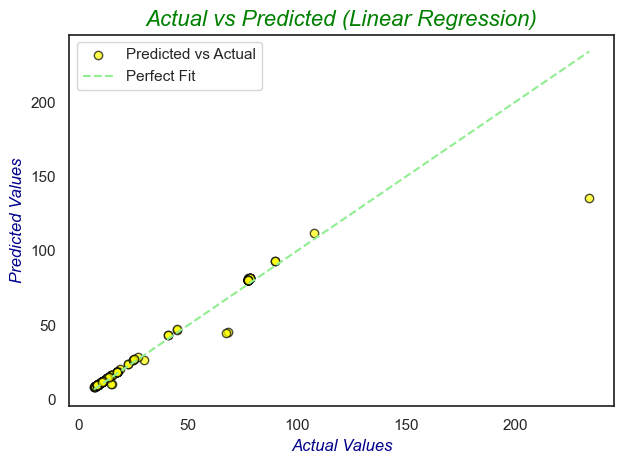

In [119]:
plt.scatter(y_test, y_pred, color='yellow', edgecolor='black', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='lightgreen', linestyle='--', label='Perfect Fit')

# Add labels and title

plt.title('Actual vs Predicted (Linear Regression)', fontsize=16, fontstyle='oblique', color='green')
plt.xlabel('Actual Values', fontsize=12,  fontstyle='oblique', color='darkblue')
plt.ylabel('Predicted Values', fontsize=12, fontstyle='oblique', color='darkblue')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### Conclusion:


The model coefficients provide insight into the relationship between the features (state_bottle_cost and bottles_sold) and the target (sale_dollars).


The R-squared value indicates that approximately 56.8% of the variance in sale_dollars is explained by the linear combination of state_bottle_cost and bottles_sold.


The MSE indicates the average squared error between the actual and predicted sale amounts.


In [123]:
# Define predictors (X) and target (y)
feature_cols = ['pack',	'bottle_volume_ml',	'state_bottle_cost', 'state_bottle_retail',	'bottles_sold', 'volume_sold_liters']
X = df[feature_cols]
y = df['sale_dollars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Coefficients: [-4.05573961e-01  5.11252569e-02  2.96249913e+02 -1.96530810e+02
  6.03420665e+00  4.56367497e+00]
Intercept: -4.1704709677447696
Mean Squared Error (MSE): 41.059153570835825
R-squared: 0.9641903476325265


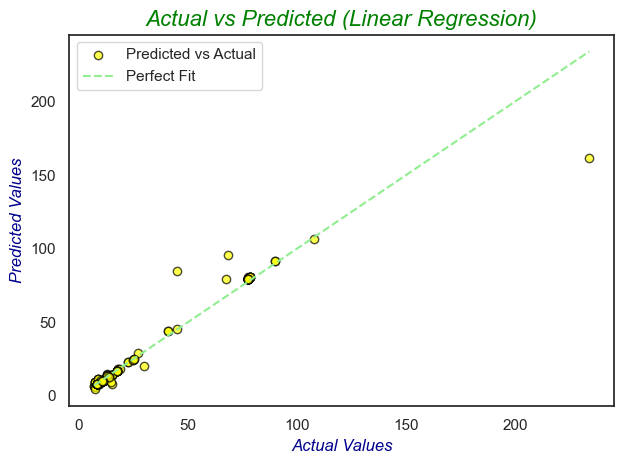

In [125]:
plt.scatter(y_test, y_pred, color='yellow', edgecolor='black', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='lightgreen', linestyle='--', label='Perfect Fit')

# Add labels and title
plt.title('Actual vs Predicted (Linear Regression)', fontsize=16, fontstyle='oblique', color='green')
plt.xlabel('Actual Values', fontsize=12,  fontstyle='oblique', color='darkblue')
plt.ylabel('Predicted Values', fontsize=12, fontstyle='oblique', color='darkblue')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Conclusion

### 1. Model Performance:

1. **Strong Fit**: The model explains 96.4% of the variation in the target variable (sale_dollars), which is excellent.
   The R-squared value of 0.964 suggests that the predictors in the model (such as pack',	'bottle_volume_ml',	'state_bottle_cost', 'state_bottle_retail',	'bottles_sold', 'volume_sold_liters) are highly relevant in predicting sales dollars.

2. **Low MSE**: The MSE of 41.06 indicates that the model's predictions are relatively close to the actual sales dollars.

3. **Feature Importance**: state_bottle_cost has the largest positive coefficient, suggesting that the cost of the bottle has a strong influence on sale_dollars.
Higher costs tend to be associated with higher sales, potentially due to premium pricing strategies.

state_bottle_retail has the largest negative coefficient, indicating that as the retail price increases, sales revenue tends to decrease. This is expected as higher prices can drive down demand.

bottles_sold and volume_sold_liters have positive coefficients, aligning with the idea that more units sold or larger volumes sold drive higher revenue.

### We can say that this linear regression model does an excellent job of predicting liquor sales (sale_dollars) based on the given features, explaining a large portion of the variance and making fairly accurate predictions.

## Cross Validation

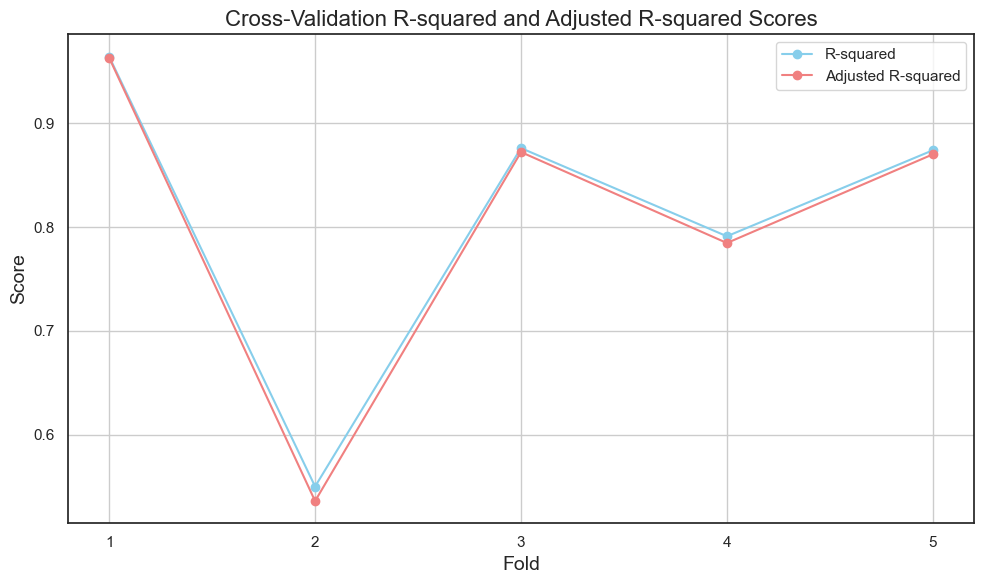

Mean R-squared: 0.8111
Mean Adjusted R-squared: 0.8053


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer



# Initialize the Linear Regression model
model = LinearRegression()

# Cross-validation settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, X):
    n = len(y_true)  # Number of observations
    p = X.shape[1]   # Number of predictors
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))  # R-squared
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared
    return adj_r2

# Arrays to store the R-squared and Adjusted R-squared scores
r2_scores = []
adj_r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)  # Fit the model
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    
    # Calculate Adjusted R-squared
    adj_r2 = adjusted_r2_score(y_test, y_pred, X_test)
    adj_r2_scores.append(adj_r2)

# Convert the results to numpy arrays for easy plotting
r2_scores = np.array(r2_scores)
adj_r2_scores = np.array(adj_r2_scores)

# Plot R-squared and Adjusted R-squared
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', label='R-squared', color='skyblue')
plt.plot(range(1, len(adj_r2_scores) + 1), adj_r2_scores, marker='o', label='Adjusted R-squared', color='lightcoral')

# Adding title and labels
plt.title('Cross-Validation R-squared and Adjusted R-squared Scores', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(range(1, len(r2_scores) + 1))  # Make sure x-ticks match the number of folds
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Print mean R-squared and Adjusted R-squared scores
print(f'Mean R-squared: {r2_scores.mean():.4f}')
print(f'Mean Adjusted R-squared: {adj_r2_scores.mean():.4f}')


## Ridge

##### Calculate Ridge Regression model

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression



# Cross-validation settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, X):
    n = len(y_true)  # Number of observations
    p = X.shape[1]   # Number of predictors
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))  # R-squared
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared
    return adj_r2

# Arrays to store the R-squared and Adjusted R-squared scores
r2_scores = []
adj_r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)  # Fit the model
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    
    # Calculate Adjusted R-squared
    adj_r2 = adjusted_r2_score(y_test, y_pred, X_test)
    adj_r2_scores.append(adj_r2)

# Convert the results to numpy arrays for easy plotting
r2_scores = np.array(r2_scores)
adj_r2_scores = np.array(adj_r2_scores)

# Calculate the standard deviation for R-squared and Adjusted R-squared
std_r2 = np.std(r2_scores)
std_adj_r2 = np.std(adj_r2_scores)

# Print the standard deviations
print(f'Standard Deviation of R-squared: {std_r2:.4f}')
print(f'Standard Deviation of Adjusted R-squared: {std_adj_r2:.4f}')



Standard Deviation of R-squared: 0.1415
Standard Deviation of Adjusted R-squared: 0.1459


In [145]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

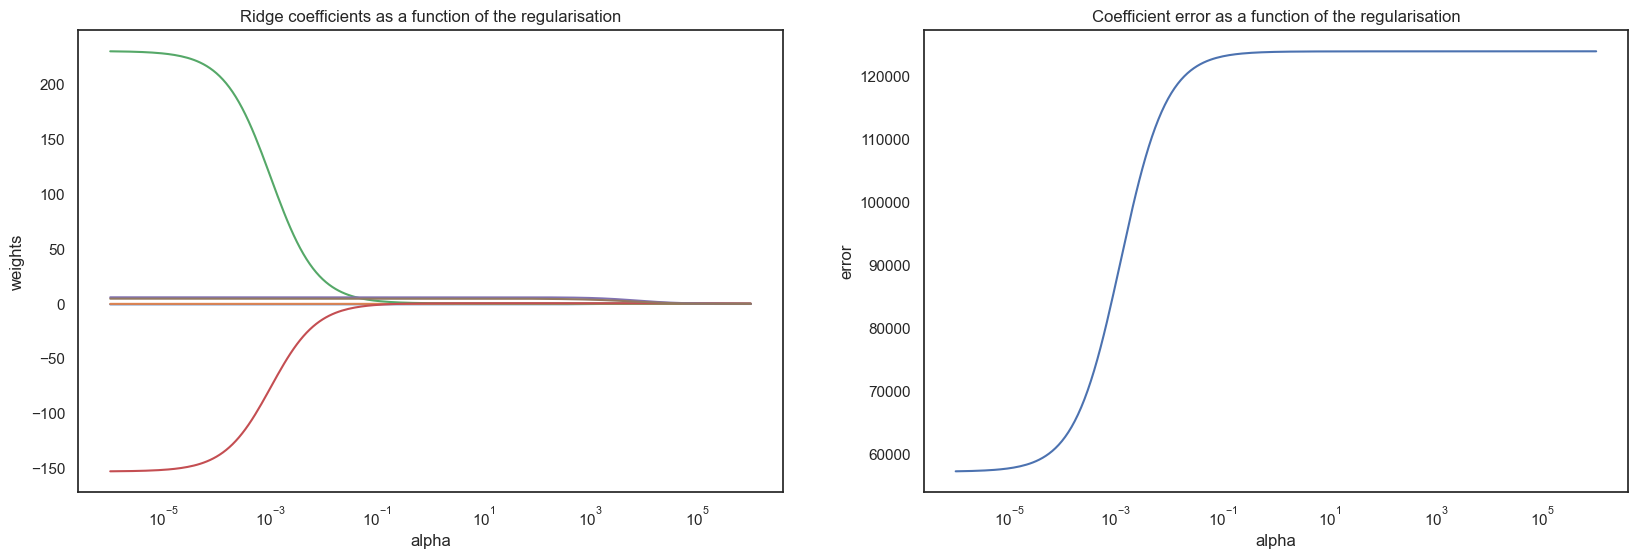

In [146]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

# <span style="color:red">*Logistic Regression Model*

Logistic regression can be applied to predict **high** vs. **low** sales based on features like bottle size, cost, and sales volume etc. However, since sale_dollars is a continuous variable, it must be converted into a binary outcome (such as "High Sales" vs. "Low Sales") by setting an appropriate threshold. 


Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [152]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [153]:

# Define the feature columns and target column
feature_cols = ['pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'volume_sold_liters']
target_col = 'sale_dollars'

# Assuming you have a DataFrame `df`
# Convert `sale_dollars` to binary: 1 if sale_dollars is above median and set it as target variable, else 0
median_sales = df[target_col].median()
df['high_sales'] = (df[target_col] > median_sales).astype(int)

# Features (X) and target (y)
X = df[feature_cols]
y = df['high_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model using classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       159
           1       0.99      0.91      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



In [154]:
df['high_sales'] 

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: high_sales, Length: 1000, dtype: int64

In [156]:
# Confusion matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
cm

Confusion Matrix:


array([[158,   1],
       [ 12, 129]])

In [157]:
# Confusion matrix
cm1 = np.array([[158, 1], [12, 129]])

# Convert to a pandas DataFrame
cm1_df = pd.DataFrame(cm, index=['Actual Low Sales', 'Actual High Sales'],
                     columns=['Predicted Low Sales', 'Predicted High Sales'])

# Display the DataFrame
cm1_df

,Predicted Low Sales,Predicted High Sales
Actual Low Sales,158,1
Actual High Sales,12,129


### Confusion Matrix:
The confusion matrix helps you understand how well your logistic regression model is distinguishing between the two classes ("High Sales" and "Low Sales").

**True Positives (TP) 129:** Actual High Sales and Predicted High Sales: These are the instances where the model correctly predicted high sales.

**True Negatives (TN) 158:** Actual Low Sales and Predicted Low Sales: These are the instances where the model correctly predicted low sales.

**False Positives (FP) 1:** Actual Low Sales and Predicted High Sales: These are the instances where the model incorrectly predicted high sales for a data point that actually had low sales.

**False Negatives (FN) 12:** Actual High Sales and Predicted Low Sales: These are the instances where the model incorrectly predicted low sales for a data point that actually had high sales.


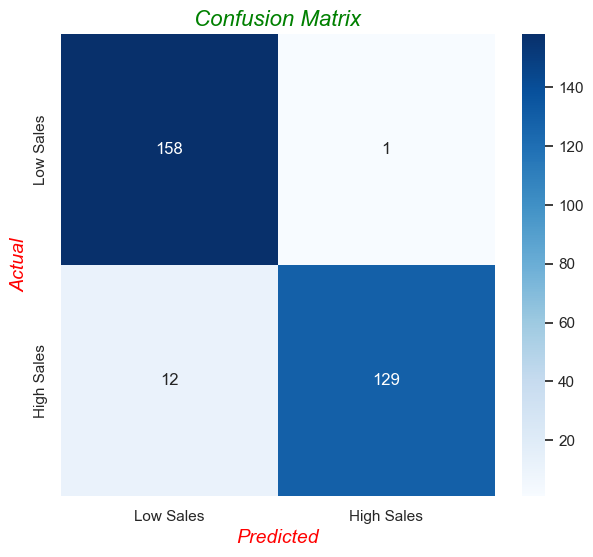

In [160]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
plt.title("Confusion Matrix", fontsize=16, fontstyle='oblique', color='green')
plt.xlabel('Predicted', fontsize=14, fontstyle='oblique', color='red')
plt.ylabel('Actual', fontsize=14, fontstyle='oblique', color='red')
plt.show()


**Heatmap:** The confusion matrix is plotted using a heatmap, where the values represent the count of the respective categories. Darker colors usually represent higher counts.

### -------->>  Interpretation of Results:

In [166]:
# Define the values for the confusion matrix
TP = 129  # True Positives
TN = 158  # True Negatives
FP = 1    # False Positives
FN = 12   # False Negatives

# Calculate Accuracy
Accuracy= (TP + TN) / (TP + TN + FP + FN) * 100
Precision= TP/(TP+FP) * 100
Recall= TP/(TP+FN) * 100

# Print the result
print(f'Accuracy = {Accuracy:.2f}%')
print(f'Precision (High Sales) = {Precision:.2f}%')
print(f'Recall ( High Sales)= {Recall:.2f}%')


Accuracy = 95.67%
Precision (High Sales) = 99.23%
Recall ( High Sales)= 91.49%


**Accuracy: 95.67% —** This means that the model correctly predicted 95.67% of the total instances (both low and high sales).

**Precision (High Sales): 99.23% —** This indicates that when the model predicted high sales, it was correct 99.23% of the time.

**Recall (High Sales): 91.49% —** This means the model correctly identified 91.56% of the actual high sales instances.

### -------->> ROC Curve:
The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of the performance of a classification model.

It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

**True Positive Rate (TPR)** is also known as recall or sensitivity.

**False Positive Rate (FPR)** is calculated as FP/(FP+TN)


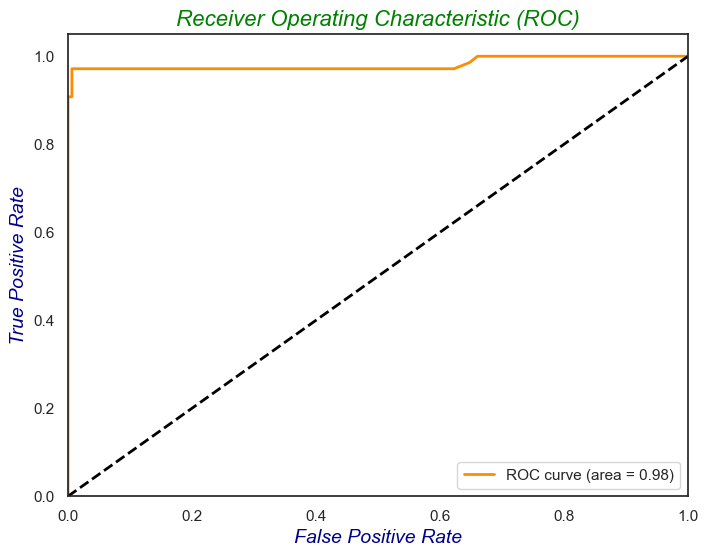

In [170]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontstyle='oblique', color='darkblue')
plt.ylabel('True Positive Rate', fontsize=14, fontstyle='oblique', color='darkblue')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, fontstyle='oblique', color='green')
plt.legend(loc="lower right")
plt.show()

### Interpretation:

**ROC Curve & AUC:** The ROC curve and AUC value give a more comprehensive understanding of model performance across different decision thresholds. A high AUC indicates that the model does a good job of distinguishing between high and low sales.

## Conclusion:

Here, **AUC values closer to 1.0** indicate **better** model performance

##  <------------<span style="color:red">**END OF MINI PROJECT-2** ----------------->

## <span style="color:blue">*Pooja Dhiman*
### <span style="color:navy">*13-January-2025*"